In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

make: *** No targets specified and no makefile found.  Stop.


In [2]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [3]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [14]:
# Get only the cubes that have our line of interest in them
mol_tag = 60503 # 60503
cubes, tbl = fetch_cubes(cubefns, catalog='CDMS', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=1>
  FREQ     ERR    LGINT    DR    ELO    GUP  MOLWT  TAG  QNFMT   Ju    Ku    vu   F1u   F2u   F3u    Jl    Kl    vl   F1l   F2l   F3l    name   Lab 
  MHz      MHz   MHz nm2        1 / cm         u                                                                                                    
float64  float64 float64 int64 float64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64   str8   bool
-------- ------- ------- ----- ------- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- -------- ----
133785.9   0.005 -3.2369     2 22.3137    23    60   503   101    11    --    --    --    --    --    10    --    --    --    --    -- OCS, v=0 True, <Table length=1>
   FREQ      ERR    LGINT    DR    ELO    GUP  MOLWT  TAG  QNFMT   Ju    Ku    vu   F1u   F2u   F3u    Jl    Kl    vl   F1l   F2l   F3l    name   Lab 
   MHz       MHz   MHz nm2        1 / cm         u                  

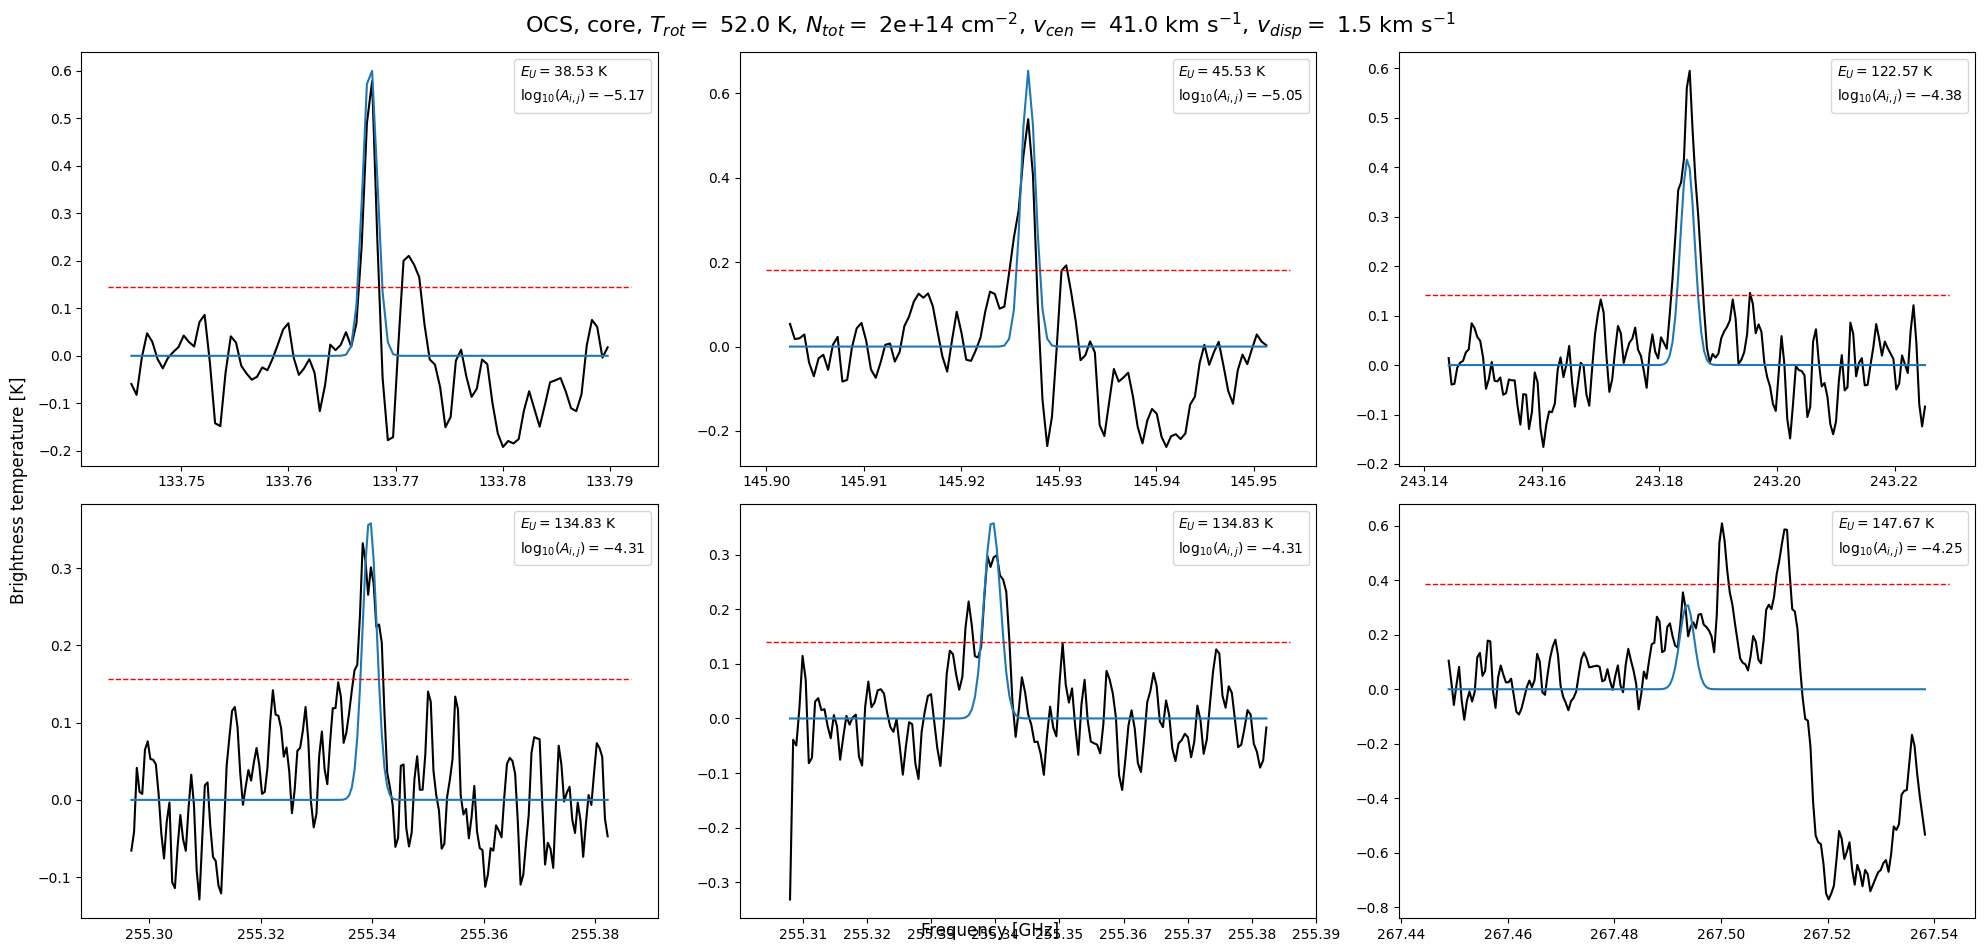

In [15]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 52., N_tot = 2.0e+14, v_cen = 41.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=10, 
               nrows=2, ncols=3, parse_loc=False, ret_tbl=False, line_by_line=True, name_for_plot=f'OCS', extr_type="coord", crd=crd, 
               EU_cutoff_K=150, aij_cutoff=-7, show_2_sigma=True)

In [16]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

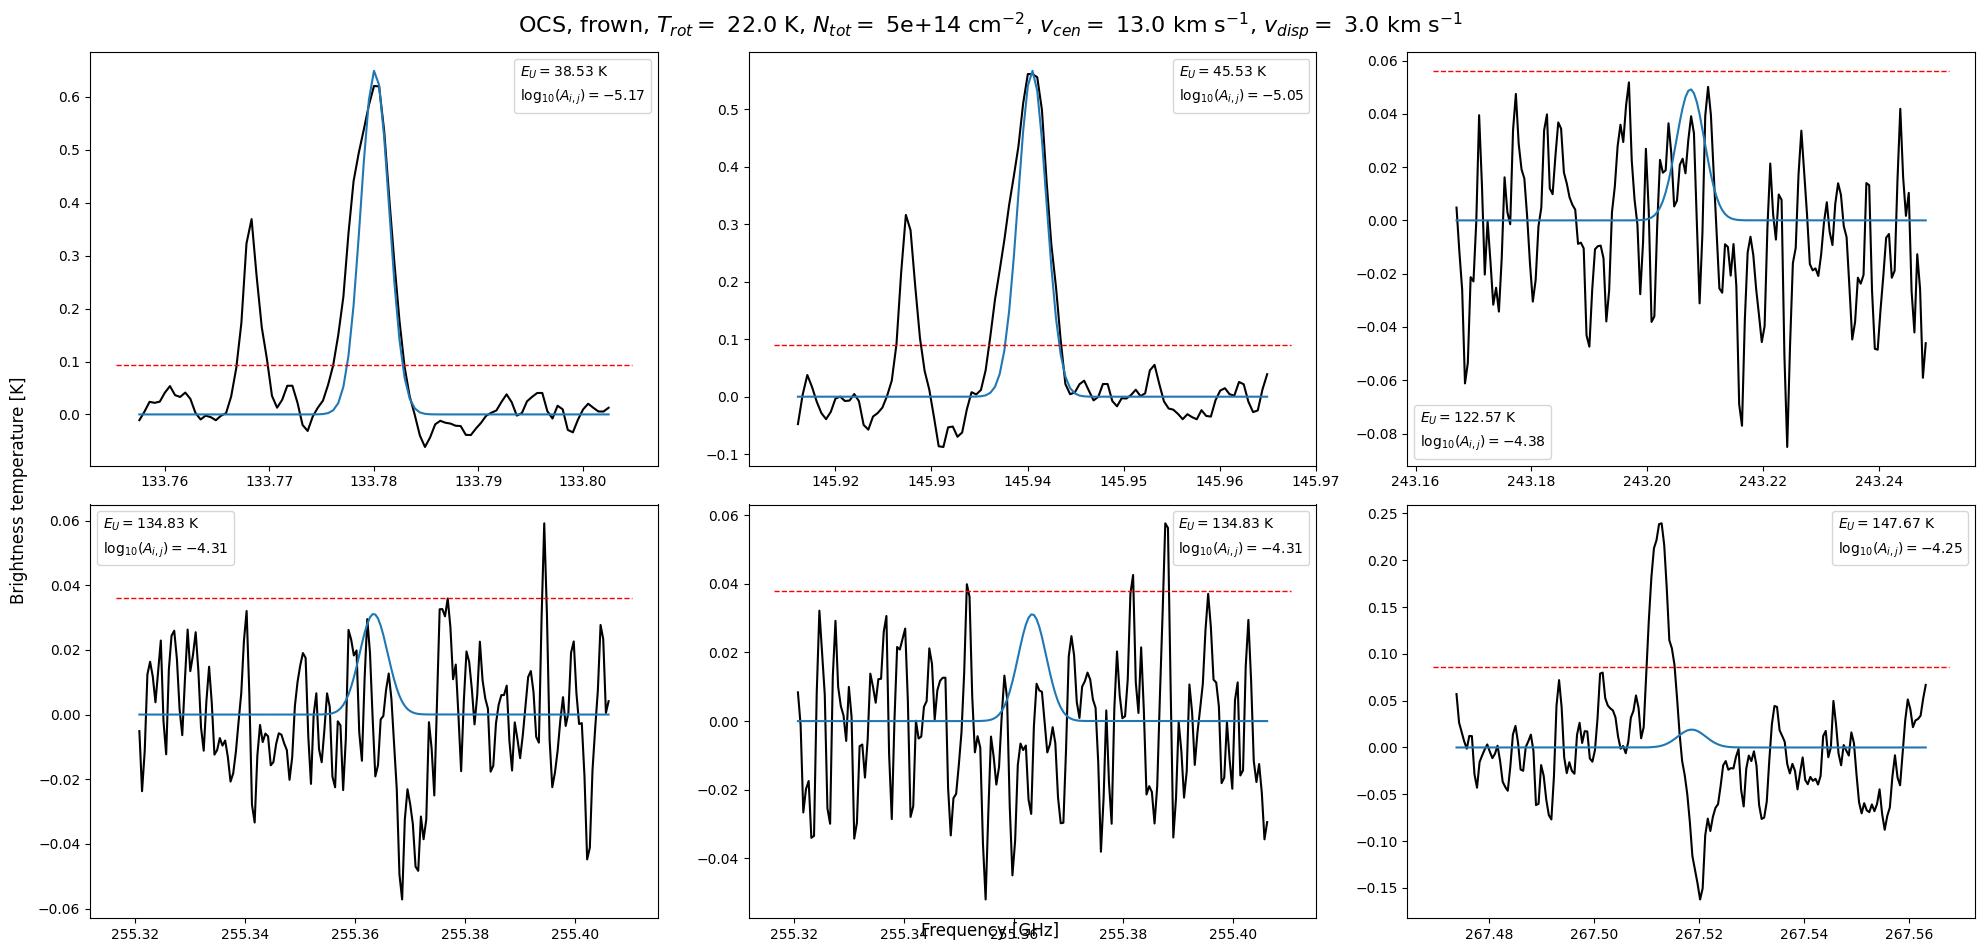

In [17]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes_masked, temp = 22., N_tot = 5.0e+14, v_cen = 13.*u.km/u.s, v_disp = 3.*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=10, 
               nrows=2, ncols=3, parse_loc=False, ret_tbl=False, line_by_line=True, name_for_plot=f'OCS', extr_type="reg", just_data=False, 
               EU_cutoff_K=150, aij_cutoff=-7, show_2_sigma=True)

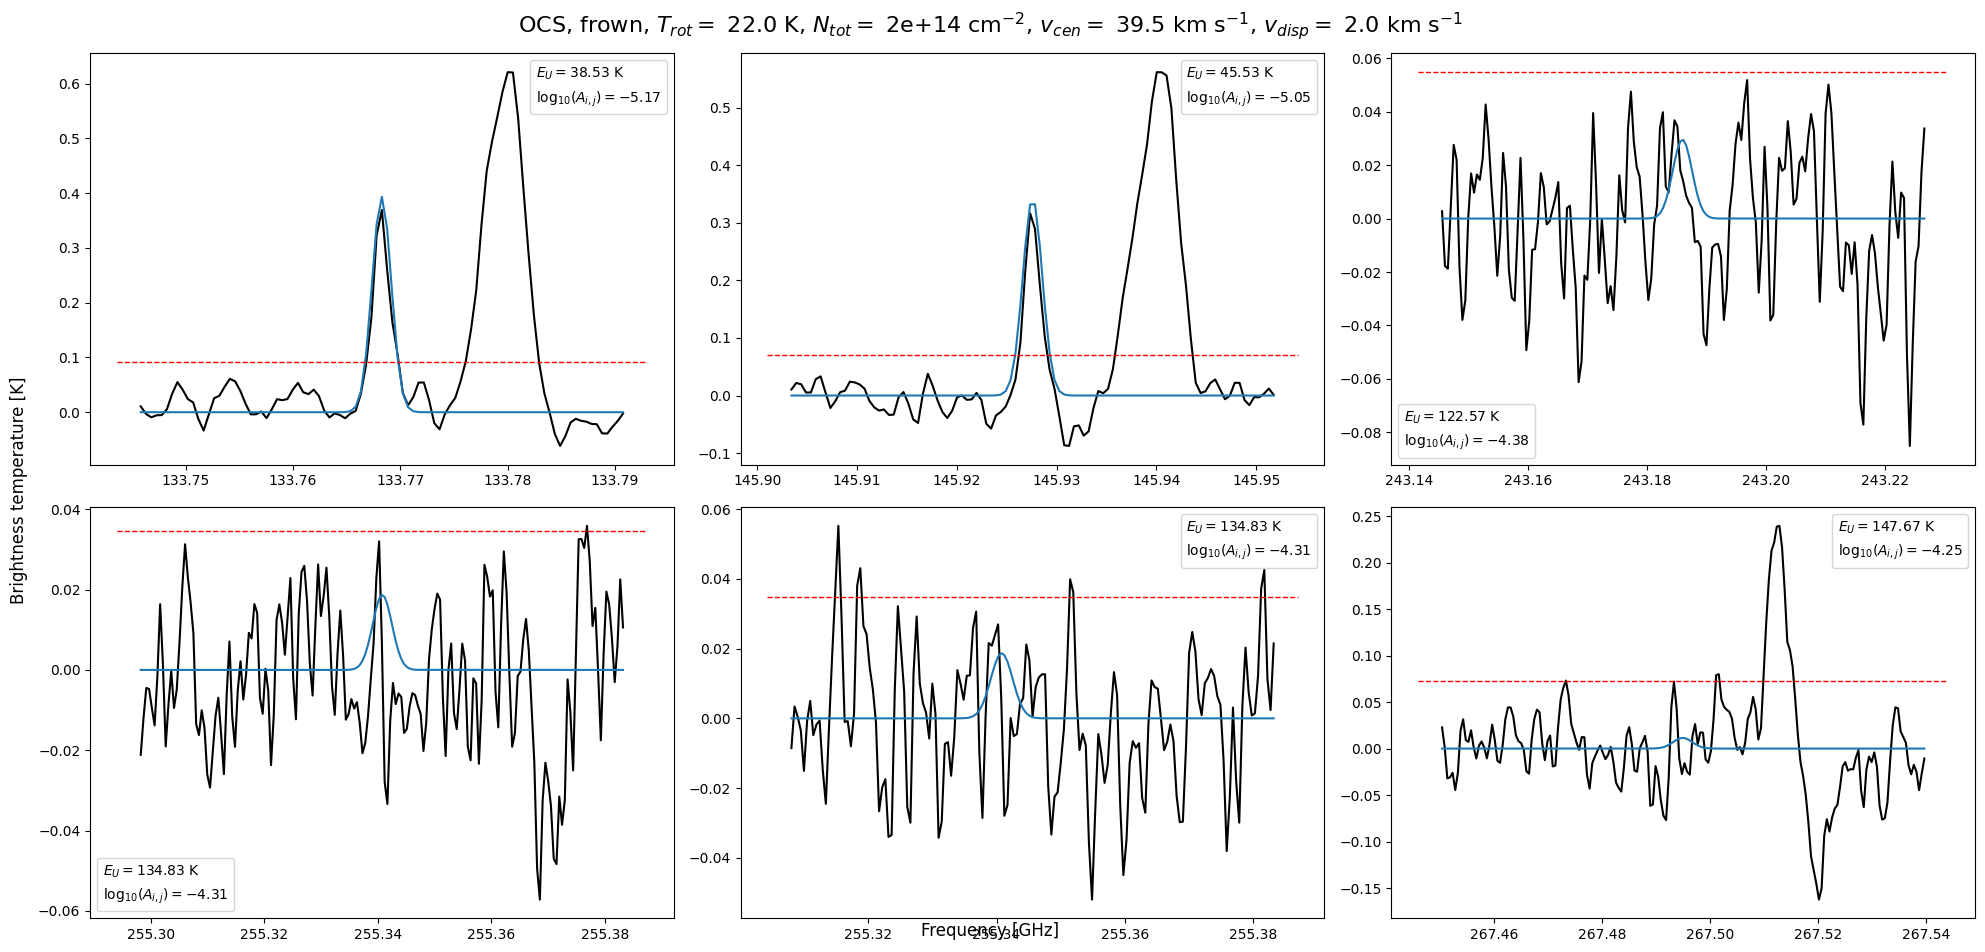

In [18]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 22., N_tot = 2.0e+14, v_cen = 39.5*u.km/u.s, v_disp = 2.*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=10, 
                       nrows=2, ncols=3, parse_loc=False, ret_tbl=False, line_by_line=True, name_for_plot=f'OCS', extr_type="reg", just_data=False,
                       EU_cutoff_K=150, aij_cutoff=-6, return_freqs=True, show_2_sigma=True)

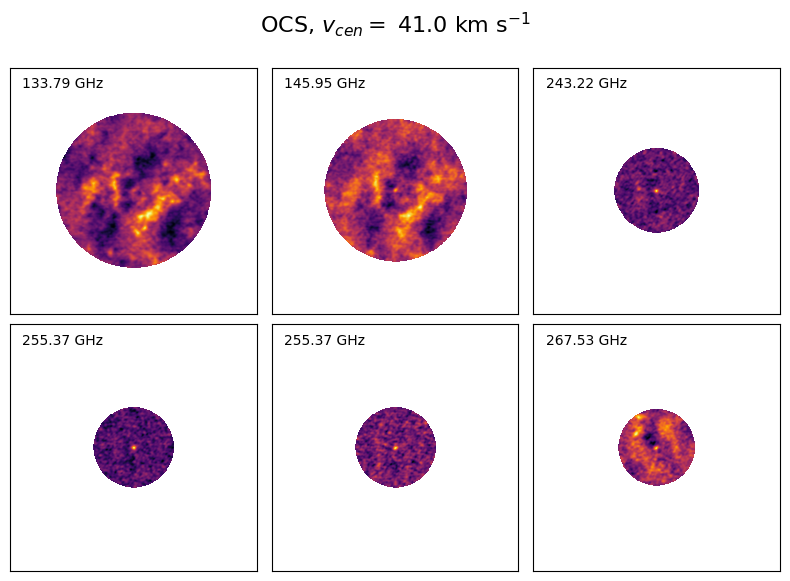

In [10]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=41*u.km/u.s, fig_width=8, fig_height=6, nrows=2, ncols=3, name_for_plot=f'OCS')

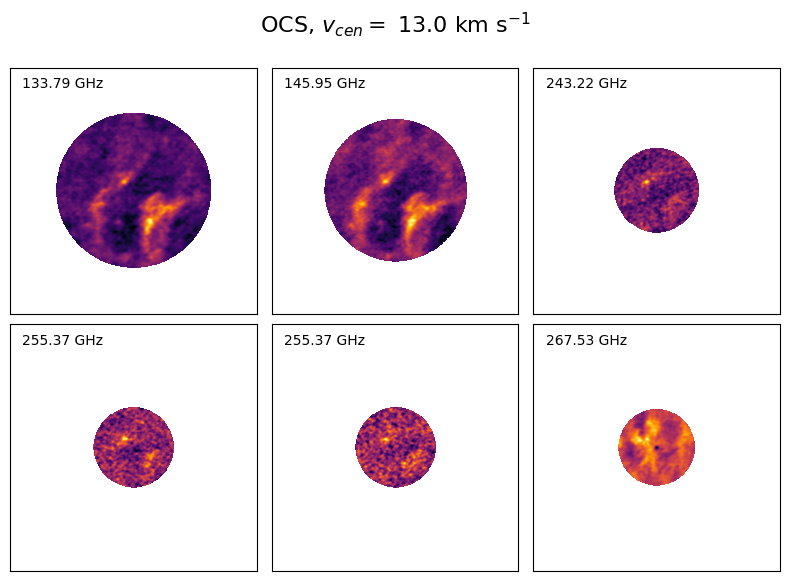

In [11]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=13*u.km/u.s, fig_width=8, fig_height=6, nrows=2, ncols=3, name_for_plot=f'OCS')